<a href="https://colab.research.google.com/github/nikhilnagaraj/Capita-AI/blob/master/NEW_MusicVAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob

print 'Copying checkpoints and example MIDI from GCS. This will take a few minutes...'
!gsutil -q -m cp -R gs://download.magenta.tensorflow.org/models/music_vae/colab2/* /content/

print 'Installing dependencies...'
!apt-get update -qq && apt-get install -qq libfluidsynth1 fluid-soundfont-gm build-essential libasound2-dev libjack-dev
!pip install -q pyfluidsynth
!pip install -qU magenta

# Hack to allow python to pick up the newly-installed fluidsynth lib.
# This is only needed for the hosted Colab environment.
import ctypes.util
orig_ctypes_util_find_library = ctypes.util.find_library
def proxy_find_library(lib):
  if lib == 'fluidsynth':
    return 'libfluidsynth.so.1'
  else:
    return orig_ctypes_util_find_library(lib)
ctypes.util.find_library = proxy_find_library


print 'Importing libraries and defining some helper functions...'
from google.colab import files
import magenta.music as mm
from magenta.models.music_vae import configs
from magenta.models.music_vae.trained_model import TrainedModel
import numpy as np
import os
import tensorflow as tf
import random as rn
os.environ['PYTHONHASHSEED'] = '42'
rn.seed(42)
tf.compat.v1.set_random_seed(
    42
)
np.random.seed(42)

# Necessary until pyfluidsynth is updated (>1.2.5).
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def play(note_sequence):
  mm.play_sequence(note_sequence, synth=mm.fluidsynth)

def download(note_sequence, filename):
  mm.sequence_proto_to_midi_file(note_sequence, filename)
  files.download(filename)

# Reference: https://github.com/tensorflow/magenta

Copying checkpoints and example MIDI from GCS. This will take a few minutes...
Installing dependencies...
Selecting previously unselected package fluid-soundfont-gm.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../fluid-soundfont-gm_3.1-5.1_all.deb ...
Unpacking fluid-soundfont-gm (3.1-5.1) ...
Preparing to unpack .../libasound2-dev_1.1.3-5ubuntu0.4_amd64.deb ...
Unpacking libasound2-dev:amd64 (1.1.3-5ubuntu0.4) over (1.1.3-5ubuntu0.2) ...
Preparing to unpack .../libasound2_1.1.3-5ubuntu0.4_amd64.deb ...
Unpacking libasound2:amd64 (1.1.3-5ubuntu0.4) over (1.1.3-5ubuntu0.2) ...
Preparing to unpack .../libasound2-data_1.1.3-5ubuntu0.4_all.deb ...
Unpacking libasound2-data (1.1.3-5ubuntu0.4) over (1.1.3-5ubuntu0.2) ...
Selecting previously unselected package libfluidsynth1:amd64.
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libasound2-data (1.1.3-5ubuntu0.4) ...
Setting

In [0]:
#Git hash: 847983a510a8fafdf555765db31a7868ff53e19d
!git clone https://github.com/lucasnfe/vgmidi.git
%cd vgmidi
!git checkout 847983a510a8fafdf555765db31a7868ff53e19d
%cd /content/

# Reference: https://github.com/lucasnfe/vgmidi/

Cloning into 'vgmidi'...
remote: Enumerating objects: 972, done.
remote: Counting objects: 100% (972/972), done.
remote: Compressing objects: 100% (925/925), done.
remote: Total 8536 (delta 68), reused 933 (delta 46), pack-reused 7564
Receiving objects: 100% (8536/8536), 1.35 GiB | 34.19 MiB/s, done.
Resolving deltas: 100% (1930/1930), done.
Checking out files: 100% (5855/5855), done.
/content/vgmidi
Note: checking out '847983a510a8fafdf555765db31a7868ff53e19d'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 847983a Balance even more the dataset
/content


In [0]:
%cd /content/checkpoints/
%mkdir 256_model
%mkdir 512_model
%mkdir 1024_model

# 256 z space
!wget -O '256_model_download' --no-check-certificate "https://onedrive.live.com/download?cid=E5938DDE4E57F6B2&resid=E5938DDE4E57F6B2%2111209&authkey=AGE-MzRJpXAWfw0"
!unzip 256_model_download -d 256_model

# 512 z space
!wget -O '512_model_download' --no-check-certificate "https://onedrive.live.com/download?cid=D1C1322B7B768AF5&resid=D1C1322B7B768AF5%21282693&authkey=AHczOCHmfnFBovM"
!unzip 512_model_download -d 512_model

# 1024 z space
!wget -O '1024_model_download' --no-check-certificate "https://onedrive.live.com/download?cid=D1C1322B7B768AF5&resid=D1C1322B7B768AF5%21282931&authkey=AOrVV0oTrLBTV3c"
!unzip 1024_model_download -d 1024_model
%cd 1024_model
!mv model.ckpt-636-002.data-00000-of-00001 model.ckpt-636.data-00000-of-00001
%cd /content/checkpoints/

%cd /content/

/content/checkpoints
--2020-04-05 21:44:35--  https://onedrive.live.com/download?cid=E5938DDE4E57F6B2&resid=E5938DDE4E57F6B2%2111209&authkey=AGE-MzRJpXAWfw0
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://u8lopw.db.files.1drv.com/y4mPsxgYIDsBxC2Qj5jD8HpCIfLAwDkW_grufZZ5ymsFx89MZH-swyv6YBHYNOewiuCKEYI3f21EeL1mG96qqbHl_TwgrISdIPEcaao0qbGE5kgwPIr4GgfbMl6xj55vXLLnj6mZLpV85iF3urdCB1UvzvlNhn8Fa9uQrWjLt7PTJWKbEFyQ-106dMdZSQ8YDmg0AnG8kDycGJuF7OnADTUog/Arquivo.zip?download&psid=1 [following]
--2020-04-05 21:44:35--  https://u8lopw.db.files.1drv.com/y4mPsxgYIDsBxC2Qj5jD8HpCIfLAwDkW_grufZZ5ymsFx89MZH-swyv6YBHYNOewiuCKEYI3f21EeL1mG96qqbHl_TwgrISdIPEcaao0qbGE5kgwPIr4GgfbMl6xj55vXLLnj6mZLpV85iF3urdCB1UvzvlNhn8Fa9uQrWjLt7PTJWKbEFyQ-106dMdZSQ8YDmg0AnG8kDycGJuF7OnADTUog/Arquivo.zip?download&psid=1
Resolving u8lopw.db.files.1drv.com (u8lo

In [0]:
import copy

# Monophonic 2 bar network configuration
mel_2bar_config = copy.deepcopy(configs.CONFIG_MAP['cat-mel_2bar_big'])
mel_2bar = TrainedModel(mel_2bar_config, batch_size=4, checkpoint_dir_or_path='/content/checkpoints/mel_2bar_big.ckpt')

# Monophonic 16 bar network configuration (Latent z space: 512 - pretrained magenta model) (Hereby refered to as 'magenta 512 z space')
mel_16bar_config = copy.deepcopy(configs.CONFIG_MAP['hierdec-mel_16bar'])
mel_16bar_config.hparams.z_size = 512
mel_16bar = TrainedModel(mel_16bar_config, batch_size=4, checkpoint_dir_or_path='/content/checkpoints/mel_16bar_hierdec.ckpt')

# Monophonic 16 bar network configuration (Latent z space: 256) (Hereby refered to as '256 z space')
mel_16bar_config_256 = copy.deepcopy(configs.CONFIG_MAP['hierdec-mel_16bar'])
mel_16bar_config_256.hparams.z_size = 256
mel_16bar_256 = TrainedModel(mel_16bar_config_256, batch_size=4, checkpoint_dir_or_path='/content/checkpoints/256_model/model.ckpt-535')

# Monophonic 16 bar network configuration (Latent z space: 512) (Hereby refered to as '512 z space')
mel_16bar_config_512 = copy.deepcopy(configs.CONFIG_MAP['hierdec-mel_16bar'])
mel_16bar_config_512.hparams.z_size = 512
mel_16bar_512 = TrainedModel(mel_16bar_config_512, batch_size=4, checkpoint_dir_or_path='/content/checkpoints/512_model/model.ckpt-585')

# Monophonic 16 bar network configuration (Latent z space: 1024) (Hereby refered to as '1024 z space')
mel_16bar_config_1024 = copy.deepcopy(configs.CONFIG_MAP['hierdec-mel_16bar'])
mel_16bar_config_1024.hparams.z_size = 1024
mel_16bar_1024 = TrainedModel(mel_16bar_config_1024, batch_size=4, checkpoint_dir_or_path='/content/checkpoints/1024_model/model.ckpt-636')


W0405 21:52:13.896990 140388893763456 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/magenta/models/music_vae/trained_model.py:58: The name tf.gfile.IsDirectory is deprecated. Please use tf.io.gfile.isdir instead.

W0405 21:52:13.900793 140388893763456 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/magenta/models/music_vae/base_model.py:157: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

W0405 21:52:13.902307 140388893763456 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/magenta/models/music_vae/base_model.py:161: The name tf.train.get_or_create_global_step is deprecated. Please use tf.compat.v1.train.get_or_create_global_step instead.

W0405 21:52:13.958728 140388893763456 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/magenta/models/music_vae/lstm_models.py:107: The name tf.VariableScope is deprecated. Please use tf.compat.v1.VariableScope instead.

W0405 21:52:13.9

## Load Data


In [0]:
#@title Extract file paths and piece IDs
import os
def extract_paths(DIR='/content/vgmidi',file='vgmidi_sent_train.csv'):
  positive_paths = []
  negative_paths = []
  with open(os.path.join(DIR,file)) as f:
    row = [line.split() for line in f][1:]
    for r in row:
      r=r[0].split(',')
      if r[0] == '1':
        positive_paths.append((r[-1],r[1]))
      else:
        negative_paths.append((r[-1],r[1]))    
    return positive_paths, negative_paths

train_positive_paths, train_negative_paths = extract_paths('/content/vgmidi','vgmidi_sent_train.csv')
test_positive_paths, test_negative_paths = extract_paths('/content/vgmidi','vgmidi_sent_test.csv')

In [0]:
#@title Load midi files
def extract_midi_data(DIR='/content/vgmidi',path_list=None):
  if not path_list:
    raise ValueError("No path list found")
  
  input_mel_midi_data = [
    tf.gfile.Open(fn).read()
    for fn in sorted(tf.gfile.Glob(os.path.join(DIR,path[0]) for path in path_list))               
  ]
  return input_mel_midi_data

positive_train_input_mel_midi_data = extract_midi_data('/content/vgmidi',train_positive_paths)
negative_train_input_mel_midi_data = extract_midi_data('/content/vgmidi',train_negative_paths)
positive_test_input_mel_midi_data  = extract_midi_data('/content/vgmidi',test_positive_paths)
negative_test_input_mel_midi_data  = extract_midi_data('/content/vgmidi',test_negative_paths)

In [0]:
#@title Concatenate 4 bar pieces (with same piece id) into long notesequence
from magenta.music.sequences_lib import concatenate_sequences


def concatenate_pieces(midi_data=None, path_list=None):
  if not midi_data:
    raise ValueError("No midi data given")
  if not path_list:
    raise ValueError("No path list given")
  
  prev = None
  mel_input_seqs = [mm.midi_to_sequence_proto(m) for m in midi_data]
  extracted_mels = []
  tempList = []
  for ix,ns in enumerate(mel_input_seqs):
    if not prev:
      prev = path_list[ix][1]
      tempList.append(ns)
    elif path_list[ix][1] == prev:
      tempList.append(ns)
    else:
      extracted_mels.append(concatenate_sequences(tempList))
      tempList = []
      tempList.append(ns)
      prev = path_list[ix][1]
  
  return extracted_mels

positive_train_concatenated_mels = concatenate_pieces(positive_train_input_mel_midi_data, train_positive_paths)
negative_train_concatenated_mels = concatenate_pieces(negative_train_input_mel_midi_data, train_negative_paths)
negative_test_concatenated_mels  = concatenate_pieces(negative_test_input_mel_midi_data,  test_negative_paths)
positive_test_concatenated_mels  = concatenate_pieces(positive_test_input_mel_midi_data,  test_positive_paths)

In [0]:
#@title Extract 'n' bar sequences from longer notesequences
def extract_sequences(config=None,sequence_data=None):
    if not sequence_data:
      raise ValueError("No data given")
    if not config:
      raise ValueError("No config given")

    extracted_sequences = []
    for ns in sequence_data:
      new_mel = config.data_converter.to_notesequences(
          config.data_converter.to_tensors(ns)[1])
      extracted_sequences.extend(new_mel)
    
    return extracted_sequences

In [0]:
#@title Extract 2 bar sequences
positive_2bar_train_sequences = extract_sequences(mel_2bar_config,positive_train_concatenated_mels)
negative_2bar_train_sequences = extract_sequences(mel_2bar_config,negative_train_concatenated_mels)
positive_2bar_test_sequences = extract_sequences(mel_2bar_config,positive_test_concatenated_mels)
negative_2bar_test_sequences = extract_sequences(mel_2bar_config,negative_test_concatenated_mels)

In [0]:
#@title Extract 16 bar sequences

# (Magenta) 512 z space
positive_16bar_train_sequences = extract_sequences(mel_16bar_config,positive_train_concatenated_mels)
negative_16bar_train_sequences = extract_sequences(mel_16bar_config,negative_train_concatenated_mels)
positive_16bar_test_sequences = extract_sequences(mel_16bar_config,positive_test_concatenated_mels)
negative_16bar_test_sequences = extract_sequences(mel_16bar_config,negative_test_concatenated_mels)

# 256 z space
positive_16bar_train_sequences_256 = extract_sequences(mel_16bar_config_256,positive_train_concatenated_mels)
negative_16bar_train_sequences_256 = extract_sequences(mel_16bar_config_256,negative_train_concatenated_mels)
positive_16bar_test_sequences_256 = extract_sequences(mel_16bar_config_256,positive_test_concatenated_mels)
negative_16bar_test_sequences_256 = extract_sequences(mel_16bar_config_256,negative_test_concatenated_mels)

# 512 z space
positive_16bar_train_sequences_512 = extract_sequences(mel_16bar_config_512,positive_train_concatenated_mels)
negative_16bar_train_sequences_512 = extract_sequences(mel_16bar_config_512,negative_train_concatenated_mels)
positive_16bar_test_sequences_512 = extract_sequences(mel_16bar_config_512,positive_test_concatenated_mels)
negative_16bar_test_sequences_512 = extract_sequences(mel_16bar_config_512,negative_test_concatenated_mels)

# 1024 z space
positive_16bar_train_sequences_1024 = extract_sequences(mel_16bar_config_1024,positive_train_concatenated_mels)
negative_16bar_train_sequences_1024 = extract_sequences(mel_16bar_config_1024,negative_train_concatenated_mels)
positive_16bar_test_sequences_1024 = extract_sequences(mel_16bar_config_1024,positive_test_concatenated_mels)
negative_16bar_test_sequences_1024 = extract_sequences(mel_16bar_config_1024,negative_test_concatenated_mels)

In [0]:
#@title Extract latent vectors
from tqdm import tqdm_notebook

def extract_latent_vector(model=None,sequence=None):
  if not model:
    raise ValueError("No model given")
  if not sequence:
    raise ValueError("No sequence given")
  latent_vector = []
  for i in tqdm_notebook(range(len(sequence))):
    try:
      z, _, _ = model.encode([sequence[i]])
      latent_vector.append(z)
    except:
      print "Throw invalid sequence"
  return latent_vector

In [0]:
#@title Extract 2 bar latent vectors

# (Magenta) 512 z space
positive_2bar_train_latent_vectors = extract_latent_vector(mel_2bar,positive_2bar_train_sequences)
negative_2bar_train_latent_vectors = extract_latent_vector(mel_2bar,negative_2bar_train_sequences)
positive_2bar_test_latent_vectors = extract_latent_vector(mel_2bar,positive_2bar_test_sequences)
negative_2bar_test_latent_vectors = extract_latent_vector(mel_2bar,negative_2bar_test_sequences)

Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence



Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence



Throw invalid sequence
Throw invalid sequence



In [0]:
#@title Extract 16 bar latent vectors

# (Magenta) 512 z space
positive_16bar_train_latent_vectors = extract_latent_vector(mel_16bar,positive_16bar_train_sequences)
negative_16bar_train_latent_vectors = extract_latent_vector(mel_16bar,negative_16bar_train_sequences)
positive_16bar_test_latent_vectors = extract_latent_vector(mel_16bar,positive_16bar_test_sequences)
negative_16bar_test_latent_vectors = extract_latent_vector(mel_16bar,negative_16bar_test_sequences)

# 256 z space
positive_16bar_train_latent_vectors_256 = extract_latent_vector(mel_16bar_256,positive_16bar_train_sequences_256)
negative_16bar_train_latent_vectors_256 = extract_latent_vector(mel_16bar_256,negative_16bar_train_sequences_256)
positive_16bar_test_latent_vectors_256 = extract_latent_vector(mel_16bar_256,positive_16bar_test_sequences_256)
negative_16bar_test_latent_vectors_256 = extract_latent_vector(mel_16bar_256,negative_16bar_test_sequences_256)

# 512 z space
positive_16bar_train_latent_vectors_512 = extract_latent_vector(mel_16bar_512,positive_16bar_train_sequences_512)
negative_16bar_train_latent_vectors_512 = extract_latent_vector(mel_16bar_512,negative_16bar_train_sequences_512)
positive_16bar_test_latent_vectors_512 = extract_latent_vector(mel_16bar_512,positive_16bar_test_sequences_512)
negative_16bar_test_latent_vectors_512 = extract_latent_vector(mel_16bar_512,negative_16bar_test_sequences_512)

#1024 z space
positive_16bar_train_latent_vectors_1024 = extract_latent_vector(mel_16bar_1024,positive_16bar_train_sequences_1024)
negative_16bar_train_latent_vectors_1024 = extract_latent_vector(mel_16bar_1024,negative_16bar_train_sequences_1024)
positive_16bar_test_latent_vectors_1024 = extract_latent_vector(mel_16bar_1024,positive_16bar_test_sequences_1024)
negative_16bar_test_latent_vectors_1024 = extract_latent_vector(mel_16bar_1024,negative_16bar_test_sequences_1024)

Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence



Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence



Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence



Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence



Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence



Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence



Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence



Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence
Throw invalid sequence



In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# (Magenta) 512 z space
x = np.concatenate((np.squeeze(np.array(positive_16bar_train_latent_vectors)),np.squeeze(np.array(negative_16bar_train_latent_vectors))),axis=0)
y = np.concatenate((np.ones(len(positive_16bar_train_latent_vectors)),np.zeros(len(negative_16bar_train_latent_vectors))),axis=0)
x_shuffled, y_shuffled = shuffle(x,y,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_shuffled, y_shuffled, test_size=0.1, random_state=28)
x_test = np.concatenate((np.squeeze(np.array(positive_16bar_test_latent_vectors)),np.squeeze(np.array(negative_16bar_test_latent_vectors))),axis=0)
y_test = np.concatenate((np.ones(len(positive_16bar_test_latent_vectors)),np.zeros(len(negative_16bar_test_latent_vectors))),axis=0)

# 256 z space
x_256 = np.concatenate((np.squeeze(np.array(positive_16bar_train_latent_vectors_256)),np.squeeze(np.array(negative_16bar_train_latent_vectors_256))),axis=0)
y_256 = np.concatenate((np.ones(len(positive_16bar_train_latent_vectors_256)),np.zeros(len(negative_16bar_train_latent_vectors_256))),axis=0)
x_shuffled_256, y_shuffled_256 = shuffle(x_256,y_256,random_state=42)
x_train_256, x_val_256, y_train_256, y_val_256 = train_test_split(x_shuffled_256, y_shuffled_256, test_size=0.1, random_state=28)
x_test_256 = np.concatenate((np.squeeze(np.array(positive_16bar_test_latent_vectors_256)),np.squeeze(np.array(negative_16bar_test_latent_vectors_256))),axis=0)
y_test_256 = np.concatenate((np.ones(len(positive_16bar_test_latent_vectors_256)),np.zeros(len(negative_16bar_test_latent_vectors_256))),axis=0)

# 512 z space
x_512 = np.concatenate((np.squeeze(np.array(positive_16bar_train_latent_vectors_512)),np.squeeze(np.array(negative_16bar_train_latent_vectors_512))),axis=0)
y_512 = np.concatenate((np.ones(len(positive_16bar_train_latent_vectors_512)),np.zeros(len(negative_16bar_train_latent_vectors_512))),axis=0)
x_shuffled_512, y_shuffled_512 = shuffle(x_512,y_512,random_state=42)
x_train_512, x_val_512, y_train_512, y_val_512 = train_test_split(x_shuffled_512, y_shuffled_512, test_size=0.1, random_state=28)
x_test_512 = np.concatenate((np.squeeze(np.array(positive_16bar_test_latent_vectors_512)),np.squeeze(np.array(negative_16bar_test_latent_vectors_512))),axis=0)
y_test_512 = np.concatenate((np.ones(len(positive_16bar_test_latent_vectors_512)),np.zeros(len(negative_16bar_test_latent_vectors_512))),axis=0)

#1024 z space
x_1024 = np.concatenate((np.squeeze(np.array(positive_16bar_train_latent_vectors_1024)),np.squeeze(np.array(negative_16bar_train_latent_vectors_1024))),axis=0)
y_1024 = np.concatenate((np.ones(len(positive_16bar_train_latent_vectors_1024)),np.zeros(len(negative_16bar_train_latent_vectors_1024))),axis=0)
x_shuffled_1024, y_shuffled_1024 = shuffle(x_1024,y_1024,random_state=42)
x_train_1024, x_val_1024, y_train_1024, y_val_1024 = train_test_split(x_shuffled_1024, y_shuffled_1024, test_size=0.1, random_state=28)
x_test_1024 = np.concatenate((np.squeeze(np.array(positive_16bar_test_latent_vectors_1024)),np.squeeze(np.array(negative_16bar_test_latent_vectors_1024))),axis=0)
y_test_1024 = np.concatenate((np.ones(len(positive_16bar_test_latent_vectors_1024)),np.zeros(len(negative_16bar_test_latent_vectors_1024))),axis=0)

In [0]:
#@title Logistic Regression (KFold)
import pandas as pd
from sklearn.model_selection import KFold,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from pprint import pprint

def kfold_crossval(model,x,y,cv=10):
  c_vals = C=2**np.arange(-20, 1).astype(np.float)
  high_acc, best_pen, best_c, best_model = 0, None, 0, None
  for penalty in ['l1','l2']:
    for c in c_vals:
        print "Penalty: %s and C: %0.2f\n" % (penalty, c)
        model.C, model.penalty = c, penalty
        results = cross_val_score(model, x, y, cv=KFold(n_splits=cv, random_state=42))
        print "Accuracy: %0.2f (+/- %0.2f)\n" % (results.mean(), results.std() * 2)
        if (results.mean()*100 > high_acc):
          best_model, high_acc, best_pen, best_c = model, results.mean()*100, penalty, c
  print ("Best Accuracy (%):",high_acc)
  print ("Best Penalty:",best_pen)
  print ("Best C:",best_c)
  return best_model.fit(x_shuffled, y_shuffled)

In [0]:
#@title Logistic Regression (KFold - gridsearch)
def kfold_gridsearch(model,x,y,cv=10):
  clf = GridSearchCV(model, dict(C=2**np.arange(-20, 1).astype(np.float), penalty=['l1','l2']), cv=cv, verbose=0)
  best_model = clf.fit(x, y)
  params, mean, std = clf.cv_results_['params'], clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score']
  penalty, c = [p['penalty'] for p in params], [p['C'] for p in params]
  gridsearch = pd.DataFrame([pd.Series(x) for x in [penalty, c, mean, std]]).T
  gridsearch.columns = ['Penalty', 'C', 'Accuracy: Mean', 'Accuracy: Standard Deviation']
  print(gridsearch)
  print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
  print('Best C:', best_model.best_estimator_.get_params()['C'])
  return best_model

In [0]:
#@title KFold LogReg
# (Magenta) 512 z space
logreg_kfold = kfold_crossval(LogisticRegression(random_state=42),x_shuffled, y_shuffled, 10)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00



/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.01

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.02

Accuracy: 0.43 (+/- 0.13)

Penalty: l1 and C: 0.03

Accuracy: 0.57 (+/- 0.09)

Penalty: l1 and C: 0.06

Accuracy: 0.61 (+/- 0.11)

Penalty: l1 and C: 0.12

Accuracy: 0.62 (+/- 0.12)

Penalty: l1 and C: 0.25

Accuracy: 0.60 (+/- 0.09)

Penalty: l1 and C: 0.50

Accuracy: 0.60 (+/- 0.07)

Penalty: l1 and C: 1.00

Accuracy: 0.60 (+/- 0.07)

Penalty: l2 and C: 0.00

Accuracy: 0.

In [0]:
# 256 z space
logreg_kfold_256 = kfold_crossval(LogisticRegression(random_state=42),x_shuffled_256, y_shuffled_256, 10)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.01

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.02

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.03

Accuracy: 0.58 (+/- 0.13)

Penalty: l1 and C: 0.06

Accuracy: 0.57 (+/- 0.13)

Penalty: l1 and C: 0.12

Accuracy: 0.59 (+/- 0.14)

Penalty: l1 and C: 0.25

Accuracy: 0.56 (+/- 0.16)

Penalty: l1 

In [0]:
# 512 z space
logreg_kfold_512 = kfold_crossval(LogisticRegression(random_state=42),x_shuffled_512, y_shuffled_512, 10)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.01

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.02

Accuracy: 0.45 (+/- 0.15)

Penalty: l1 and C: 0.03

Accuracy: 0.56 (+/- 0.13)

Penalty: l1 and C: 0.06

Accuracy: 0.55 (+/- 0.11)

Penalty: l1 and C: 0.12

Accuracy: 0.54 (+/- 0.11)

Penalty: l1 and C: 0.25

Accuracy: 0.53 (+/- 0.12)

Penalty: l1 

In [0]:
# 1024 z space
logreg_kfold_1024 = kfold_crossval(LogisticRegression(random_state=42),x_shuffled_1024, y_shuffled_1024, 10)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.00

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.01

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.02

Accuracy: 0.42 (+/- 0.13)

Penalty: l1 and C: 0.03

Accuracy: 0.57 (+/- 0.15)

Penalty: l1 and C: 0.06

Accuracy: 0.57 (+/- 0.14)

Penalty: l1 and C: 0.12

Accuracy: 0.54 (+/- 0.10)

Penalty: l1 and C: 0.25

Accuracy: 0.53 (+/- 0.10)

Penalty: l1 

In [0]:
#@title GridSearch KFold LogReg

In [0]:
# (Magenta) 512 z space
logreg_kfold_gridsearch = kfold_gridsearch(LogisticRegression(random_state=42), x_shuffled, y_shuffled, 10)

   Penalty            C Accuracy: Mean Accuracy: Standard Deviation
0       l1  9.53674e-07       0.417795                   0.00539693
1       l2  9.53674e-07        0.59381                     0.014821
2       l1  1.90735e-06       0.417795                   0.00539693
3       l2  1.90735e-06        0.59381                     0.014821
4       l1   3.8147e-06       0.417795                   0.00539693
5       l2   3.8147e-06        0.59381                     0.014821
6       l1  7.62939e-06       0.417795                   0.00539693
7       l2  7.62939e-06        0.59381                     0.014821
8       l1  1.52588e-05       0.417795                   0.00539693
9       l2  1.52588e-05       0.591876                    0.0141267
10      l1  3.05176e-05       0.417795                   0.00539693
11      l2  3.05176e-05       0.597679                      0.01331
12      l1  6.10352e-05       0.417795                   0.00539693
13      l2  6.10352e-05       0.599613          

In [0]:
# 256 z space
logreg_kfold_gridsearch_256 = kfold_gridsearch(LogisticRegression(random_state=42), x_shuffled_256, y_shuffled_256, 10)

   Penalty            C Accuracy: Mean Accuracy: Standard Deviation
0       l1  9.53674e-07       0.417795                   0.00539693
1       l2  9.53674e-07       0.582205                   0.00539693
2       l1  1.90735e-06       0.417795                   0.00539693
3       l2  1.90735e-06       0.582205                   0.00539693
4       l1   3.8147e-06       0.417795                   0.00539693
5       l2   3.8147e-06       0.582205                   0.00539693
6       l1  7.62939e-06       0.417795                   0.00539693
7       l2  7.62939e-06       0.582205                   0.00539693
8       l1  1.52588e-05       0.417795                   0.00539693
9       l2  1.52588e-05       0.582205                   0.00539693
10      l1  3.05176e-05       0.417795                   0.00539693
11      l2  3.05176e-05       0.582205                   0.00539693
12      l1  6.10352e-05       0.417795                   0.00539693
13      l2  6.10352e-05       0.582205          

In [0]:
# 512 z space
logreg_kfold_gridsearch_512 = kfold_gridsearch(LogisticRegression(random_state=42), x_shuffled_512, y_shuffled_512, 10)

   Penalty            C Accuracy: Mean Accuracy: Standard Deviation
0       l1  9.53674e-07       0.417795                   0.00539693
1       l2  9.53674e-07       0.582205                   0.00539693
2       l1  1.90735e-06       0.417795                   0.00539693
3       l2  1.90735e-06       0.582205                   0.00539693
4       l1   3.8147e-06       0.417795                   0.00539693
5       l2   3.8147e-06       0.582205                   0.00539693
6       l1  7.62939e-06       0.417795                   0.00539693
7       l2  7.62939e-06       0.582205                   0.00539693
8       l1  1.52588e-05       0.417795                   0.00539693
9       l2  1.52588e-05       0.582205                   0.00539693
10      l1  3.05176e-05       0.417795                   0.00539693
11      l2  3.05176e-05       0.582205                   0.00539693
12      l1  6.10352e-05       0.417795                   0.00539693
13      l2  6.10352e-05       0.582205          

In [0]:
# 1024 z space
logreg_kfold_gridsearch_1024 = kfold_gridsearch(LogisticRegression(random_state=42), x_shuffled_1024, y_shuffled_1024, 10)

   Penalty            C Accuracy: Mean Accuracy: Standard Deviation
0       l1  9.53674e-07       0.417795                   0.00539693
1       l2  9.53674e-07       0.578337                    0.0157507
2       l1  1.90735e-06       0.417795                   0.00539693
3       l2  1.90735e-06       0.578337                    0.0157507
4       l1   3.8147e-06       0.417795                   0.00539693
5       l2   3.8147e-06       0.578337                    0.0157507
6       l1  7.62939e-06       0.417795                   0.00539693
7       l2  7.62939e-06       0.578337                    0.0157507
8       l1  1.52588e-05       0.417795                   0.00539693
9       l2  1.52588e-05       0.580271                    0.0152729
10      l1  3.05176e-05       0.417795                   0.00539693
11      l2  3.05176e-05       0.580271                    0.0152729
12      l1  6.10352e-05       0.417795                   0.00539693
13      l2  6.10352e-05       0.580271          

In [0]:
#@title KNN classifier
from sklearn.neighbors import KNeighborsClassifier

def fit_sentiment_KNN(trX, trY, teX, teY, num_neigh=np.arange(1,100)):
  scores = []

  # Hyper-parameter optimization
  for i, n in enumerate(num_neigh):
      knn_model = KNeighborsClassifier(n_neighbors=n)
      knn_model.fit(trX, trY)

      score = knn_model.score(teX, teY)
      scores.append(score)

  n = num_neigh[np.argmax(scores)]

  sent_classfier = KNeighborsClassifier(n_neighbors=n)
  sent_classfier.fit(trX, trY)

  score = sent_classfier.score(teX, teY) * 100.
  return sent_classfier, score

In [0]:
clf, score_val = fit_sentiment_KNN(x_train,y_train,x_val,y_val)

In [0]:
clf.score(x_test,y_test)

0.5555555555555556

In [0]:
#@title Plot datapoints and classifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def plotData(x,y,title,numDim):
  if numDim != 2 and numDim != 3:
    raise ValueError("Invalid value for number of dimensions. Can be 2 or 3. ")
  x_embedded = TSNE(n_components=numDim, perplexity=200, n_iter=5000, learning_rate=100).fit_transform(x)
  posIx = [y==1]
  negIx = [y==0]
  if numDim == 2:
    plt.scatter(x_embedded[posIx][:,0],x_embedded[posIx][:,1], marker='+', c='red')
    plt.scatter(x_embedded[negIx][:,0],x_embedded[negIx][:,1], marker='o', c='blue')
    plt.title(title)
    plt.xlabel("Reduced Dimension 1")
    plt.ylabel("Reduced Dimension 2")
    plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


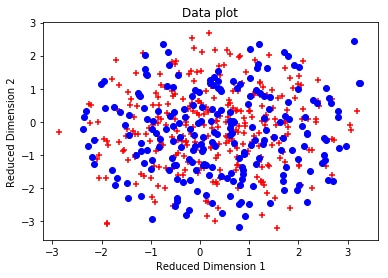

In [0]:
# (Magenta) 512 z space
plotData(x, y, title="Data plot", numDim=2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


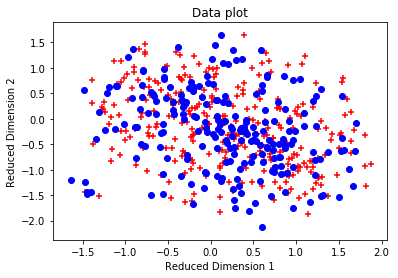

In [0]:
# 256 z space
plotData(x_256, y_256, title="Data plot", numDim=2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


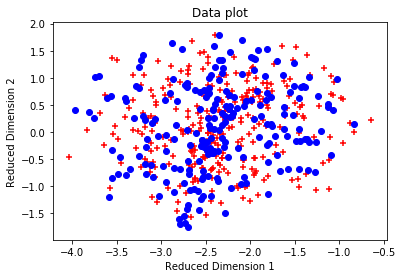

In [0]:
# 512 z space
plotData(x_512, y_512, title="Data plot", numDim=2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


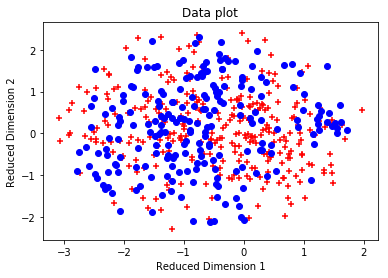

In [0]:
# 1024 z space
plotData(x_1024, y_1024, title="Data plot", numDim=2)

In [0]:
#@title Support vector classifier (Linear, RBF & Poly)
from sklearn import svm
def fit_sentiment_SVM(trX, trY, teX, teY, c_vars=[0.001,0.01,0.1,1,10,100,1000,10**8]):
  
  def fit_sentiment_LinearC_SVM(trX, trY, teX, teY, c_vars=c_vars):
    scores = []
    # Hyper-parameter optimization
    for i, c in enumerate(c_vars):
      svm_model = svm.SVC(kernel='linear', C=c)
      svm_model.fit(trX, trY)
      score = svm_model.score(teX, teY)
      scores.append(score)

    C = c_vars[np.argmax(scores)]

    svm_model = svm.SVC(kernel='linear', C=float(C))
    svm_model.fit(trX, trY)
    score = svm_model.score(teX, teY) * 100
    return svm_model,score,svm.SVC(kernel='linear', C=float(C))

  def fit_sentiment_RBF_SVM(trX, trY, teX, teY, c_vars=c_vars):
    scores = []
    # Hyper-parameter optimization
    for i, c in enumerate(c_vars):
      svm_model = svm.SVC(kernel='rbf', gamma=0.6, C=c)
      svm_model.fit(trX, trY)
      score = svm_model.score(teX, teY)
      scores.append(score)

    svm_model = svm.SVC(kernel='rbf', gamma=0.6, C=c)
    svm_model.fit(trX, trY)
    score = svm_model.score(teX, teY) * 100
    return svm_model,score,svm.SVC(kernel='rbf', gamma=0.6, C=c)
  def fit_sentiment_POLY_SVM(trX, trY, teX, teY, c_vars=c_vars):
    scores = []
    # Hyper-parameter optimization
    for i, c in enumerate(c_vars):
      svm_model = svm.SVC(kernel='poly', degree=3, C=c)
      svm_model.fit(trX, trY)
      score = svm_model.score(teX, teY)
      scores.append(score)

    C = c_vars[np.argmax(scores)]
    svm_model = svm.SVC(kernel='poly', degree=3, C=c)
    svm_model.fit(trX, trY)
    score = svm_model.score(teX, teY) * 100
    return svm_model,score,svm.SVC(kernel='poly', degree=3, C=c)
  def fit_sentiment_Linear_SVM(trX, trY, teX, teY, c_vars=c_vars):
    scores = []
    # Hyper-parameter optimization
    for i, c in enumerate(c_vars):
      svm_model = svm.LinearSVC(C=c)
      svm_model.fit(trX, trY)
      score = svm_model.score(teX, teY)
      scores.append(score)

    svm_model = svm.LinearSVC(C=c)
    svm_model.fit(trX, trY)
    score = svm_model.score(teX, teY) * 100
    return svm_model,score,svm.LinearSVC(C=c)
  scores = []
  scores.append(fit_sentiment_LinearC_SVM(trX, trY, teX, teY))
  scores.append(fit_sentiment_RBF_SVM(trX, trY, teX, teY))
  scores.append(fit_sentiment_POLY_SVM(trX, trY, teX, teY))
  scores.append(fit_sentiment_Linear_SVM(trX, trY, teX, teY))

  return max(scores, lambda v: v[1])[0]

In [0]:
#SVM

# (Magenta) 512 z space
svm_clf, score_val, model = fit_sentiment_SVM(x_train,y_train,x_val,y_val)
print score_val

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


61.53846153846154


In [0]:
#@title SVM plot (PCA)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
from numpy import *

def PCA_plotData(model,x,y,title,numDim):
  # initialize algorithms and data with random
  model = svm.LinearSVC(C=100) # Sample model PCA under SVM
  pca = PCA(n_components = 2)
  pca.fit(x,y)
  U2 = pca.fit_transform(x,y)
  model.fit(U2,y)
  #U2_x_train, U2_x_val, U2_y_train, U2_y_val = train_test_split(U2, y, test_size=0.1, random_state=28)
  #model, score_val = fit_sentiment_SVM(U2_x_train, U2_x_val, U2_y_train, U2_y_val)
  # generate grid for plotting
  x_min, x_max = U2[:,0].min() - 1, U2[:, 0].max() + 1
  y_min, y_max = U2[:,1].min() - 1, U2[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  # create decision boundary plot
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(U2[:,0],U2[:,1],c=y)
  plt.title('SVM')
  plt.xlabel("Reduced Dimension 1")
  plt.ylabel("Reduced Dimension 2")
  #plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


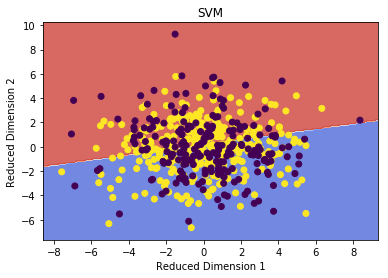

In [0]:
# SVM plot on LinearSVC
PCA_plotData(model,x,y,title='SVM Data Plot',numDim=2)

#Stage 2 - Classifying famous tracks

In [0]:
#@title Load midi files for classification
!git clone https://github.com/nikhilnagaraj/Capita-AI.git

Cloning into 'Capita-AI'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 68 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [0]:
#@title Process the midi files & apply SVM and Logistic regression classifiers
import decimal as dec
import csv

def test_midi(config, model, svm_clf, logreg_clf):
  number = 0
  log_accurate = 0
  svm_accurate = 0

  with open(os.path.join('/content/Capita-AI/Capita Emotion Data','Sentiment.csv')) as f:
      rows = list(csv.reader(f,delimiter=','))[1:]
      for r in rows:
        # Process
        try:
          file = list([[r[2]+'.mid']])
          mid = extract_midi_data('/content/Capita-AI/Capita Emotion Data/', file)[0]
          seq = extract_sequences(config=config, sequence_data=[mm.midi_to_sequence_proto(mid)])
          lv = extract_latent_vector(model=model, sequence=seq)
          x = np.squeeze(np.array(lv))
          if x.ndim == 1:
            x = x.reshape(1,-1)
          print '---------------'
          print 'Song:',r[2]
          print 'GT label:',r[1]
          print '####### SVM #######'
          pred = svm_clf.predict(x)
          print 'Result:',pred
          result = sum(pred/len(x))
          print 'Objective result:',result
          # &/| majority
          maj = dec.Decimal(result).quantize(dec.Decimal('1'), rounding=dec.ROUND_HALF_UP)
          print 'Majority voted:',maj
          print '####### LogReg #######'
          pred = logreg_clf.predict(x)
          print 'Result:',pred
          result = sum(pred/len(x))
          print 'Objective result:',result
          # &/| majority
          log_maj = dec.Decimal(result).quantize(dec.Decimal('1'), rounding=dec.ROUND_HALF_UP)
          print 'Majority voted:',log_maj
          number+=1
          if int(r[1]) == log_maj:
            log_accurate+=1
          if int(r[1]) == maj:
            svm_accurate+=1
        except Exception as e:
          pass
      return log_accurate, svm_accurate, number
      

In [0]:
# (Magenta) 512 z space
log_acc, svm_acc, number = test_midi(config=mel_16bar_config, model=mel_16bar, svm_clf=svm_clf, logreg_clf=logreg_kfold_gridsearch)


---------------
Song: Sadness and Sorrow
GT label: 0
####### SVM #######
Result: [1. 1. 1. 1. 1.]
Objective result: 1.0
Majority voted: 1
####### LogReg #######
Result: [1. 1. 1. 1. 1.]
Objective result: 1.0
Majority voted: 1


/usr/local/lib/python2.7/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)



---------------
Song: Beautiful Lie
GT label: 0
####### SVM #######
Result: [1. 1. 0. 1. 1.]
Objective result: 0.8
Majority voted: 1
####### LogReg #######
Result: [0. 1. 0. 1. 1.]
Objective result: 0.6000000000000001
Majority voted: 1


Throw invalid sequence
Throw invalid sequence

---------------
Song: A whole new world
GT label: 1
####### SVM #######
Result: [1. 1. 1.]
Objective result: 1.0
Majority voted: 1
####### LogReg #######
Result: [1. 1. 1.]
Objective result: 1.0
Majority voted: 1



---------------
Song: Dumbledore's Farewell
GT label: 0
####### SVM #######
Result: [0. 1. 0. 1. 1.]
Objective result: 0.6000000000000001
Majority voted: 1
####### LogReg #######
Result: [0. 1. 0. 1. 1.]
Objective result: 0.6000000000000001
Majority voted: 1



---------------
Song: Rising Battle Theme
GT label: 1
####### SVM #######
Result: [1. 1. 1. 1. 1.]
Objective result: 1.0
Majority voted: 1
####### LogReg #######
Result: [0. 1. 1. 1. 1.]
Objective result: 0.8
Majority voted: 1



---------------
Song: Oogway's Death Theme
GT label: 0
####### SVM #######
Result: [1.]
Objective result: 1.0
Majority voted: 1
####### LogReg #######
Result: [0.]
Objective result: 0.0
Majority voted: 0



---------------
Song: Bond's Theme
GT label: 1
####### SVM #######
Result: [1. 1. 1. 1. 1.]
Objective result: 1.0
Majority voted: 1
####### LogReg #######
Result: [1. 1. 0. 1. 0.]
Objective result: 0.6000000000000001
Majority voted: 1



---------------
Song: The Entertainer
GT label: 1
####### SVM #######
Result: [1. 1. 0. 1. 1.]
Objective result: 0.8
Majority voted: 1
####### LogReg #######
Result: [0. 1. 0. 0. 1.]
Objective result: 0.4
Majority voted: 0



---------------
Song: Mia and Sebastian's Theme
GT label: 0
####### SVM #######
Result: [1. 1. 1. 1. 1.]
Objective result: 1.0
Majority voted: 1
####### LogReg #######
Result: [1. 1. 1. 1. 1.]
Objective result: 1.0
Majority voted: 1



---------------
Song: For the damaged coda
GT label: 0
####### SVM #######
Result: [1. 1. 1. 1. 1.]
Objective result: 1.0
Majority voted: 1
####### LogReg #######
Result: [1. 0. 0. 0. 1.]
Objective result: 0.4
Majority voted: 0



---------------
Song: Jingle Bells
GT label: 1
####### SVM #######
Result: [1. 1. 1. 1. 1.]
Objective result: 1.0
Majority voted: 1
####### LogReg #######
Result: [1. 1. 1. 1. 0.]
Objective result: 0.8
Majority voted: 1


Throw invalid sequence

---------------
Song: Time
GT label: 0
####### SVM #######
Result: [1. 1. 1. 1.]
Objective result: 1.0
Majority voted: 1
####### LogReg #######
Result: [1. 1. 1. 1.]
Objective result: 1.0
Majority voted: 1


In [0]:
#@title (Magenta 512 z space) Results with ground truth (subjective label)
print log_acc/float(number)
print svm_acc/float(number)

# Stage 3: Sample

In [0]:
#@title Generate positive midi sample
# Positive sample
pred_prob = 0
mel = []
for i in range(10):
  while pred_prob < 0.95:
    melT = mel_16bar.sample(n=1, length=256, temperature=0.1)
    try:
      pred_prob = logreg_kfold_gridsearch.predict_proba((mel_16bar.encode(melT)[0]))[0][1]
    except:
      pass
  mel.append(melT[0])
  pred_prob = 0

for i in range(10):
  play(mel[i])

In [0]:
#@title Generate negative midi sample
# Negative Sample

mel = []
for i in range(10):
  pred_prob = 0
  while pred_prob < 0.95:
    melT = mel_16bar.sample(n=1, length=256, temperature=0.1)
    try:
      pred_prob = logreg_kfold_gridsearch.predict_proba((mel_16bar.encode(melT)[0]))[0][0]
    except:
      pass
  mel.append(melT[0])

for i in range(10):
  play(mel[i])